In [102]:
import numpy as np

# gamma = .5

def swf(u1, u2):
    return np.sum(np.log([u1, u2]))
    # return u1*u2

myopic = []
utils = []
for gamma in range(98):
    u1 = 1
    u2 = 1
    if gamma % 10 == 0:
        print(gamma)
    gamma = (gamma+1)/100
    for t in range(10000):
        g = gamma**t
        val_a = swf(u1 + g*1, u2 + g*2) - swf(u1, u2)
        val_b = swf(u1 + g*3, u2 + g*1) - swf(u1, u2)
        if val_a >= val_b:
            # print(f'I have selected action a at time step {t}')
            u1 += g*1
            u2 += g*2
        else:
            # print(f'I have selected action b at time step {t}')
            u1 += g*3
            u2 += g*1
    utils.append(swf(u1, u2))
    myopic.append(swf(4/(1-gamma), 1/(1-gamma)))


0
10
20
30
40
50
60
70
80
90


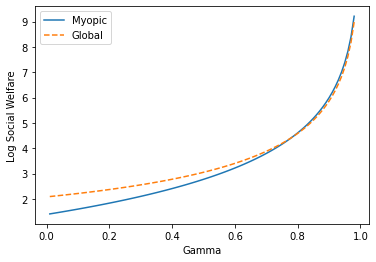

In [103]:
import matplotlib.pyplot as plt

fig = plt.figure()
x = np.arange(.01, .99, .01)
ax = fig.add_subplot()
ax.plot(x, myopic, label='Myopic')
ax.plot(x, utils, '--', label='Global')
x_ticks = [(a + 1)/100 for a in range(99)]
x = range(99)
plt.xlabel('Gamma')
plt.ylabel('Log Social Welfare')
# ax.set_xticks(np.arange(0, 100, 5))
# [l.set_visible(False) for (i,l) in enumerate(plt.xaxis.get_ticklabels()) if i % 10 != 0]

plt.legend()
plt.savefig('example1.png')